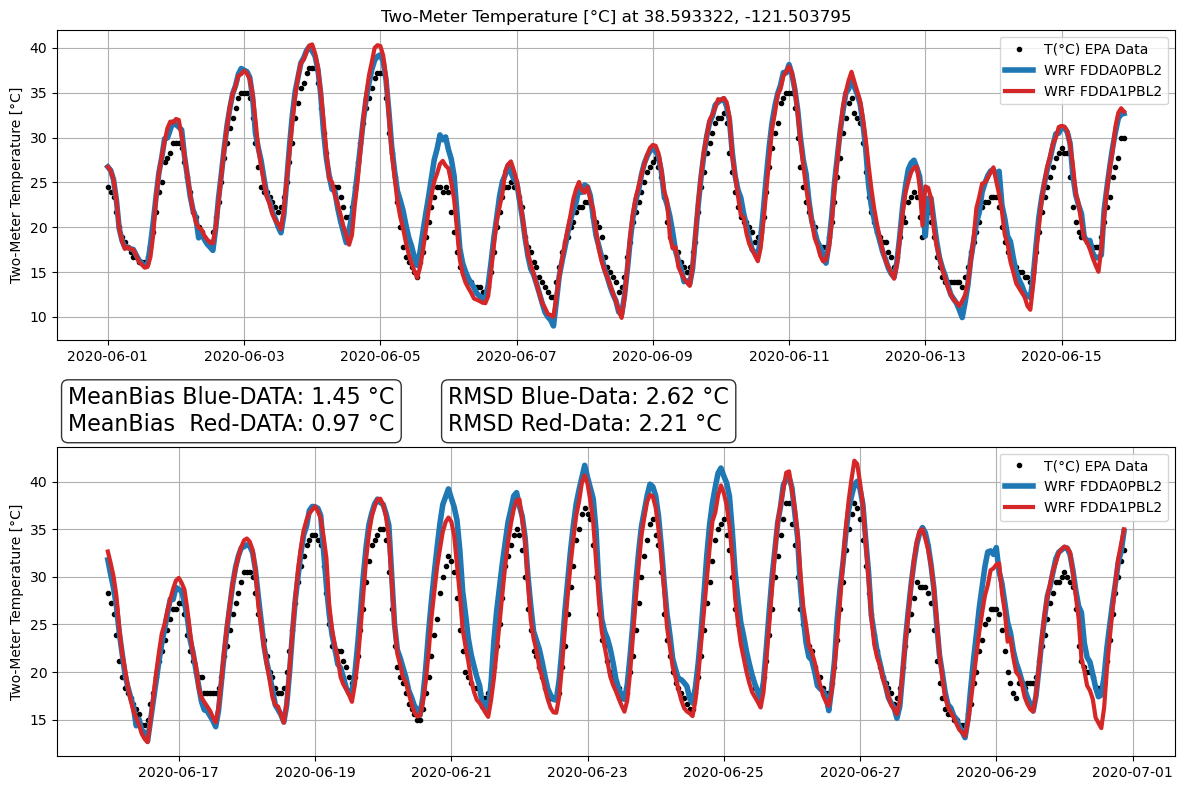

In [1]:
from T2_TimeSeries import T2_TimeSeries

T2_TimeSeries("/data/wto/EPAMetData/hourly_TEMP_2020_06_Sac.csv","/data/wto/WRFOUT/Sac_NDown_UCM1_PBL2_FDDA0_250518/wrfout_d01_2020-06-*","/data/wto/WRFOUT/Sac_NDown_UCM1_PBL2_FDDA1_250710/wrfout_d01_2020-06-*")